<a href="https://colab.research.google.com/github/aaabbbdddeee/MAT_422/blob/main/Assignment10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***3.5 and 3.6 K-means and Support Vector Machine***

3.5 K-means Clustering

Objective: To partition 'n' observations into 'k' clusters where each observation is closest to the mean of its assigned cluster. The objective is to minimize the within-cluster sum of squares (WCSS), which is the squared distance of each observation from its cluster centroid.

Algorithm:
Predefine the number of clusters 'k'.
Randomly select 'k' data points as initial cluster centers.
Assign each observation to the cluster with the nearest centroid using the Euclidean distance.
Recalculate the centroid of each cluster based on its members.
Repeat steps 2 to 4 until cluster assignments remain unchanged.

Convergence: The algorithm converges as the WCSS decreases monotonically with each iteration. The decrease is due to both the reassignment of observations to the nearest centroid and the recomputation of centroids.

3.6 Support Vector Machine (SVM)

Objective: SVM is a supervised learning model used for classification and regression. The main goal is to find a hyperplane that best separates data points of different classes, maximizing the distance (or margin) between the hyperplane and the nearest data point from either class.

In [1]:
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


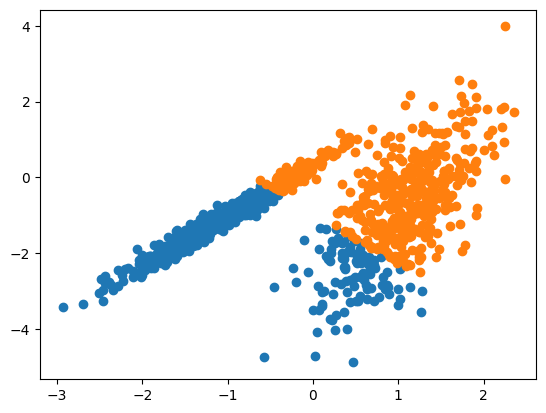

In [2]:
X, _ = make_classification(n_samples=1000, n_features=2,
                           n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, random_state=4)

model = KMeans(n_clusters=2)
model.fit(X)

yhat = model.predict(X)

clusters = unique(yhat)

for cluster in clusters:
    row_ix = where(yhat == cluster)
    plt.scatter(X[row_ix, 0], X[row_ix, 1])

plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


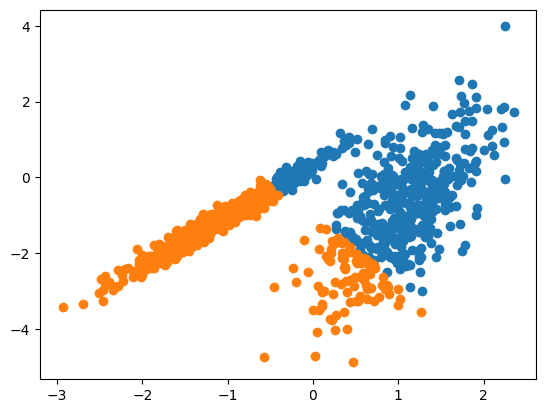

In [3]:
X, _ = make_classification(n_samples=1000, n_features=2,
                           n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, random_state=4)

model = MiniBatchKMeans(n_clusters=2)
model.fit(X)

yhat = model.predict(X)

clusters = unique(yhat)

for cluster in clusters:
    row_ix = where(yhat == cluster)
    plt.scatter(X[row_ix, 0], X[row_ix, 1])

plt.show()

In [4]:
from __future__ import print_function
from sklearn import datasets
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from ipywidgets import interact
import ipywidgets as widgets
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

plt.rcParams["figure.figsize"] = (20, 10)
%matplotlib inline

import numpy as np
import math
import cvxopt
from sklearn.preprocessing import MinMaxScaler

class DummyScaler:
    def fit(self, data):
        pass
    def transform(self, data):
        return data

def create_scaler_minmax():
    return MinMaxScaler()

In [10]:
class SVM(object):
  def fit(self, X, y):
    n_samples, n_features = X.shape

    K = np.zeros((n_samples, n_samples))
    for i in range(n_samples):
      for j in range(n_samples):
        K[i,j] = np.dot(X[i], X[j])

    P = cvxopt.matrix(np.outer(y, y) * K)
    q = cvxopt.matrix(np.ones(n_samples) * -1)
    A = cvxopt.matrix(y, (1, n_samples))
    b = cvxopt.matrix(0.0)
    G = cvxopt.matrix(np.diag(np.ones(n_samples) * -1))
    h = cvxopt.matrix(np.zeros(n_samples))
    solution = cvxopt.solvers.qp(P, q, G, h, A, b)

    a = np.ravel(solution['x'])

    sv = a > 1e-5
    ind = np.arange(len(a))[sv]
    self.a = a[sv]
    self.sv = X[sv]
    self.sv_y = y[sv]
    self.b = 0
    for n in range(len(self.a)):
      self.b += self.sv_y[n]
      self.b -= np.sum(self.a * self.sv_y * K[ind[n], sv])
      self.b /= len(self.a)

    self.w = np.zeros(n_features)
    for n in range(len(self.a)):
      self.w += self.a[n] * self.sv_y[n] * self.sv[n]

  def project(self, X):
    return np.dot(X, self.w) + self.b

  def predict(self, X):
    return np.sign(self.project(X))

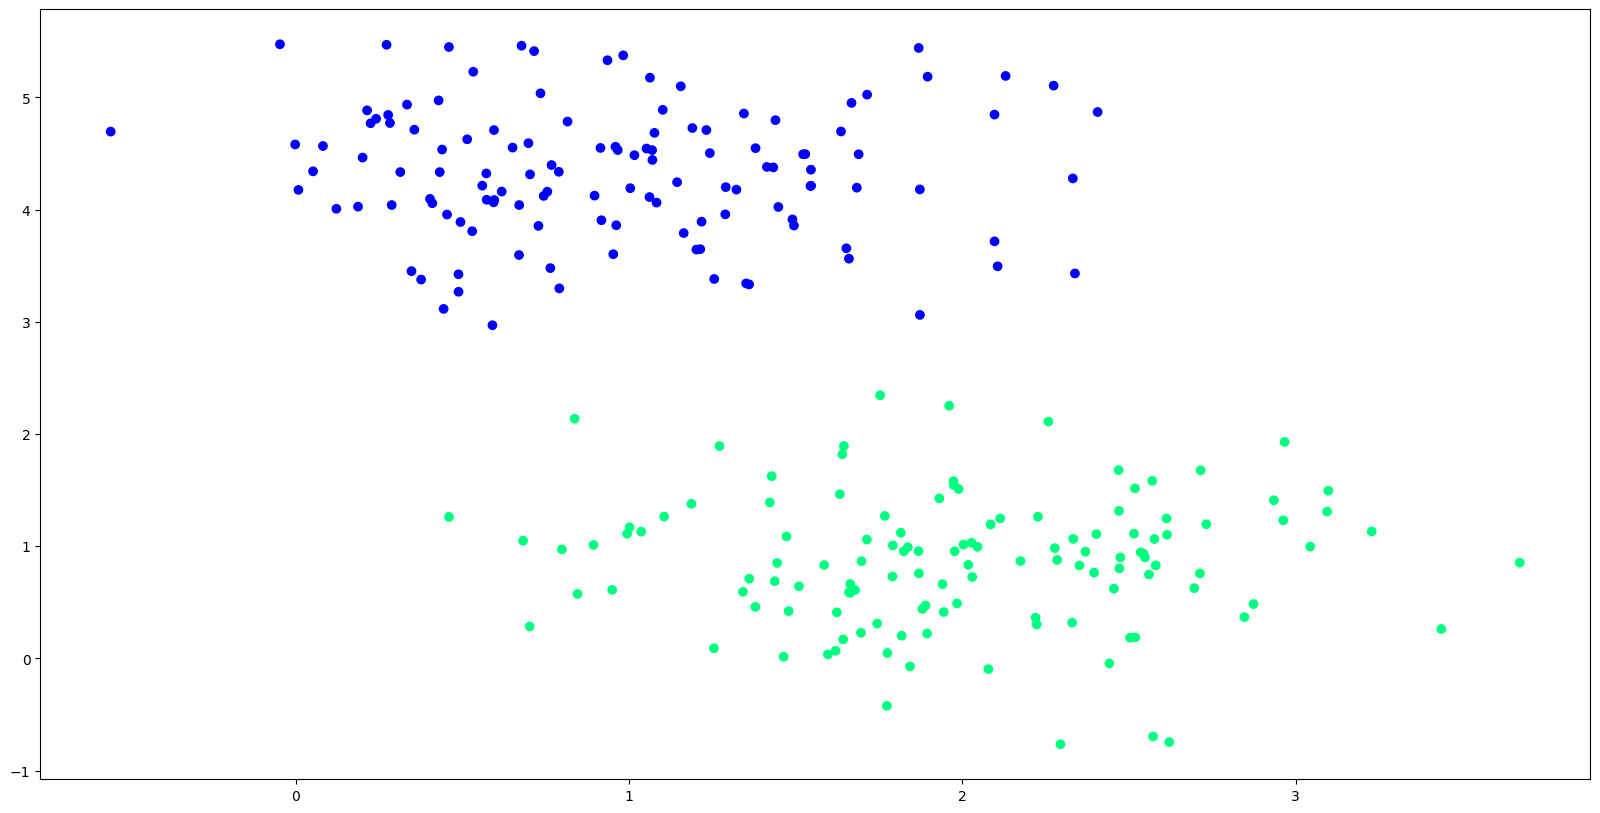

In [9]:
X, y = make_blobs(n_samples = 250, centers = 2,
                  random_state = 0, cluster_std = 0.60)
y[y == 0] = -1
tmp = np.ones(len(X))
y = tmp * y

plt.scatter(X[:, 0], X[:, 1], c = y, cmap = 'winter')

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

svm = SVM()

svm.fit(X_train, y_train)

     pcost       dcost       gap    pres   dres
 0: -1.8226e+01 -3.4458e+01  6e+02  2e+01  2e+00
 1: -2.5252e+01 -1.8773e+01  2e+02  9e+00  7e-01
 2: -5.3459e+01 -3.2711e+01  2e+02  7e+00  6e-01
 3: -7.8360e+01 -2.6482e+01  1e+02  4e+00  3e-01
 4: -5.6818e+00 -5.1750e+00  1e+01  2e-01  1e-02
 5: -3.6906e+00 -4.1082e+00  4e-01  4e-16  1e-14
 6: -4.0061e+00 -4.0104e+00  4e-03  9e-16  5e-15
 7: -4.0094e+00 -4.0094e+00  4e-05  6e-16  6e-15
 8: -4.0094e+00 -4.0094e+00  4e-07  2e-15  5e-15
Optimal solution found.


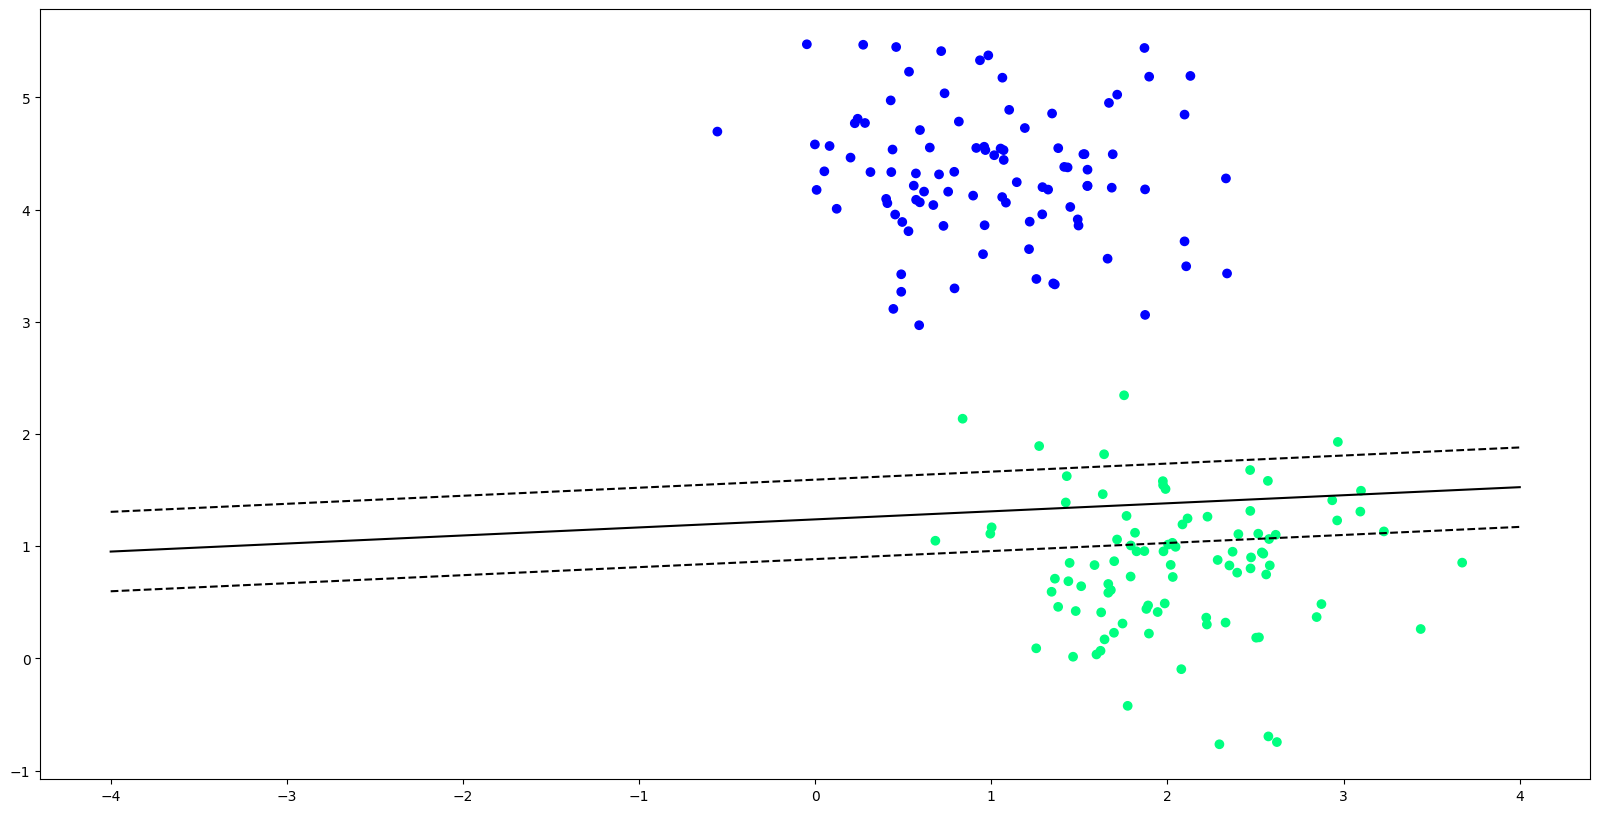

In [11]:
def f(x, w, b, c=0):
    return (-w[0] * x - b + c) / w[1]
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='winter')

# w.x + b = 0
a0 = -4; a1 = f(a0, svm.w, svm.b)
b0 = 4; b1 = f(b0, svm.w, svm.b)
plt.plot([a0,b0], [a1,b1], 'k')

# w.x + b = 1
a0 = -4; a1 = f(a0, svm.w, svm.b, 1)
b0 = 4; b1 = f(b0, svm.w, svm.b, 1)
plt.plot([a0,b0], [a1,b1], 'k--')

# w.x + b = -1
a0 = -4; a1 = f(a0, svm.w, svm.b, -1)
b0 = 4; b1 = f(b0, svm.w, svm.b, -1)
plt.plot([a0,b0], [a1,b1], 'k--')

In [12]:
y_pred = svm.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[29,  0],
       [ 7, 27]])

In [13]:
svc = LinearSVC()

svc.fit(X_train, y_train)

LinearSVC()

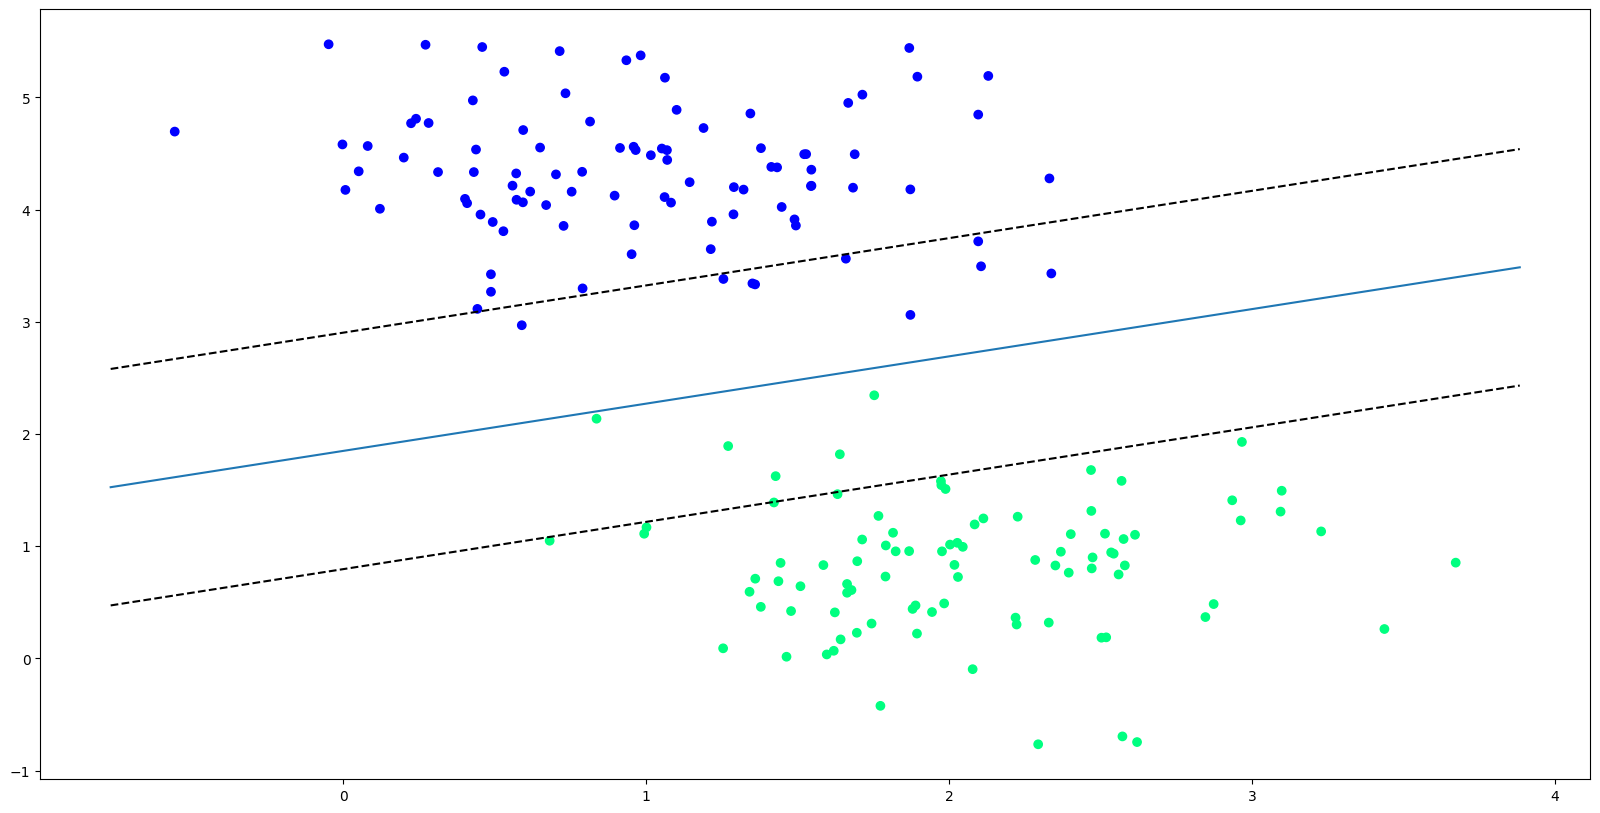

In [14]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='winter');
ax = plt.gca()
xlim = ax.get_xlim()
w = svc.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(xlim[0], xlim[1])
yy = a * xx - svc.intercept_[0] / w[1]
plt.plot(xx, yy)
yy = a * xx - (svc.intercept_[0] - 1) / w[1]
plt.plot(xx, yy, 'k--')
yy = a * xx - (svc.intercept_[0] + 1) / w[1]
plt.plot(xx, yy, 'k--')